1 ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no
supervisado?
el aprendizaje supervisado es como un proceso de entrenamiento donde un modelo aprende a mejorar sus predicciones a través de ejemplos claros y conocidos, similar a cómo una persona mejora en una tarea al practicar con retroalimentación
en cambio el no supervizado es como un proceso de descubrimiento donde un modelo explora datos sin una guía previa, identificando patrones y agrupaciones por sí mismo, similar a cómo una persona encuentra conexiones o patrones en un conjunto de información desconocido sin que nadie le diga qué buscar o cuál es la respuesta correcta.


2 En la industria de la salud, a menudo se utiliza el machine learning para predecir la
probabilidad de enfermedades o condiciones médicas en función de diferentes
variables de entrada, como síntomas, antecedentes médicos y factores de estilo de
vida. Imagina que tienes un conjunto de datos que contiene información de
pacientes y su diagnóstico (enfermo/no enfermo). ¿Qué tipo de aprendizaje
utilizarías para construir un modelo predictivo?

Utilizaría un modelo de aprendizaje supervisado con un modelo de clasificación construir un modelo predictivo 
en este caso ya que tenemos etiquetados según el diagnóstico

3 ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de
realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la
función de cada uno?

Si solo entrenaras y probaras el modelo con los mismos datos, podrías obtener un modelo que parece funcionar 
perfectamente pero que en realidad no tiene la capacidad de generalizar a datos nuevos, dividiendo el conjunto de datos,
puedes verificar si el modelo está aprendiendo de manera efectiva o si simplemente está memorizando los datos de 
entrenamiento, ademas yuda a evaluar si el modelo puede generalizar a datos nuevos, lo que es crucial para
aplicaciones prácticas

en el traning es para obtener la data y modelar en base al mismo dataset, donde el modelo ajusta sus parámetros 
internos aprendiendo de los ejemplos proporcionados
en el test se utiliza para evaluar el rendimiento del modelo después de que ha sido entrenado, es decir, que no 
hayan sido utilizados durante el entrenamiento

4 ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un
enfoque estadístico y un enfoque de aprendizaje de máquinas?

en el enfoque estadistico, se usa para explicar la relacion entre variables, 
como la variable independiente del modelo afecta a la dependiente
a diferencia del enfoque a maquinas es más como una herramienta para predecir valores futuros o no vistos, y el objetivo principal es minimizar el error de predicción

5 Escoge una industria de acuerdo a su área de interés, rubro de trabajo o área de
estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc).
Menciona al menos 1 aplicación en esa industria de:
a. Aprendizaje Supervisado (Clasificación)
b. Aprendizaje Supervisado (Regresión)
c. Aprendizaje No Supervisado (Clustering)
d. Aprendizaje No Supervisado (Reducción de dimensionalidad)

industria de la salud:
           Clasificación: utilizando imágenes de mamografías. Los modelos de clasificación supervisada pueden 
             entrenarse con imágenes etiquetadas (con o sin cáncer) para predecir la presencia de tumores malignos en 
             nuevas mamografías
           Regresión: Utilizando datos de pacientes como niveles de glucosa, presión arterial, y otros factores 
             de riesgo, los modelos de regresión supervisada pueden predecir la progresión de la diabetes.  
           Clustering: para enfermedades crónicas. Los algoritmos de clustering pueden agrupar a los 
             pacientes en diferentes segmentos basados en patrones similares en sus historiales médicos
             síntomas, y factores de riesgo
           Reducción: para e
           studios genéticos, se recopilan grandes cantidades de datos sobre la expresión génica.
             Técnicas como el análisis de componentes principales pueden reducir la dimensionalidad 
             de estos datos para identificar las características genéticas más importantes

# parte 2

In [2]:
#importamos las librerias solicitadas por el desafio 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Cargar los datos en un DataFrame
df = pd.read_csv('datahousing.csv', delimiter=';')

In [14]:
#limpieza de datos
#veremos la informacion de los datos y corroborar si hay nulos
print(df.info())

#estadistica descriptiva rapida
print(df.describe())

#contaremos los valores 
print(df.nunique())

#verificamos los datos nulos por columna
print(df.isnull().sum())

#eliminamos las filas con valores nulos
df = df.dropna()

#volvemos a revisar si hay nulos
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   guestroom        545 non-null    object
 6   hotwaterheating  545 non-null    object
 7   airconditioning  545 non-null    object
 8   parking          545 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.4+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.00

In [22]:
#como tenemos columnas con celdas "no" y "yes" las cambiamos a valores 1 y 0
#mapeamos las 3 columnas que tienen estos valores
df[['guestroom', 'hotwaterheating', 'airconditioning']] = df[['guestroom', 'hotwaterheating', 'airconditioning']].apply(lambda x: x.map({'no': 0, 'yes': 1}))

#revisamos el resultado
print(df[['guestroom', 'hotwaterheating', 'airconditioning']].head())  #Para ver cómo quedaron las columnas
print(df.dtypes)  #Para verificar los tipos de datos de estas columnas



   guestroom  hotwaterheating  airconditioning
0          0                0                1
1          0                0                1
2          0                0                0
3          0                0                1
4          1                0                1
price              int64
area               int64
bedrooms           int64
bathrooms          int64
stories            int64
guestroom          int64
hotwaterheating    int64
airconditioning    int64
parking            int64
dtype: object


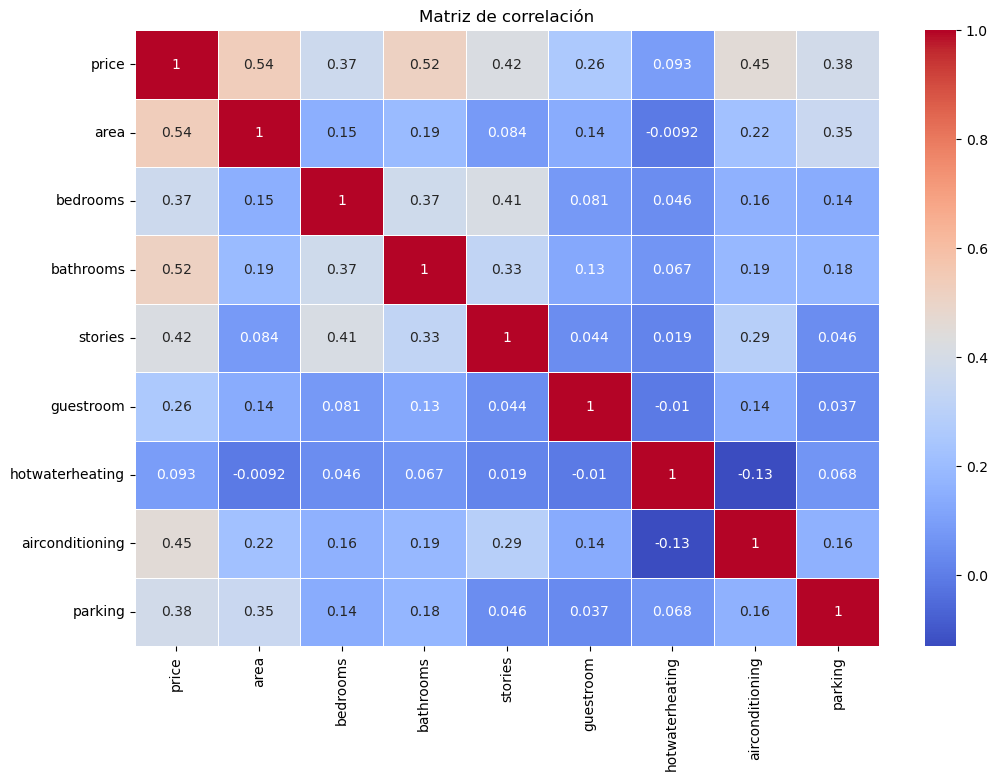

In [23]:
#Correlación entre las variables
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [25]:
#analisis adicional de correlaciones significativas
print("\nCorrelaciones significativas (absolutas > 0.5):")
print(correlation_matrix[abs(correlation_matrix) > 0.5])


Correlaciones significativas (absolutas > 0.5):
                    price      area  bedrooms  bathrooms  stories  guestroom  \
price            1.000000  0.535997       NaN   0.517545      NaN        NaN   
area             0.535997  1.000000       NaN        NaN      NaN        NaN   
bedrooms              NaN       NaN       1.0        NaN      NaN        NaN   
bathrooms        0.517545       NaN       NaN   1.000000      NaN        NaN   
stories               NaN       NaN       NaN        NaN      1.0        NaN   
guestroom             NaN       NaN       NaN        NaN      NaN        1.0   
hotwaterheating       NaN       NaN       NaN        NaN      NaN        NaN   
airconditioning       NaN       NaN       NaN        NaN      NaN        NaN   
parking               NaN       NaN       NaN        NaN      NaN        NaN   

                 hotwaterheating  airconditioning  parking  
price                        NaN              NaN      NaN  
area                        

In [27]:
#seleccionamos las variables de interés
#prediciremos las variables de los precios
X = df.drop('price', axis=1)  # Variables independientes
y = df['price']  #Variable dependiente 

In [28]:
#dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
#predecimos los valores de prueba
y_pred = model.predict(X_test)

In [38]:
#evaluamos y calculamos el modelo con el error cuadrado medio y coef
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
y_test_pred = model.predict(X_test)

In [39]:
print("\nEvaluación del modelo de regresión lineal:")
print(f"MSE: {mse}")
print(f"R^2: {r2}")


Evaluación del modelo de regresión lineal:
MSE: 1961490677565.4873
R^2: 0.6119372009958435


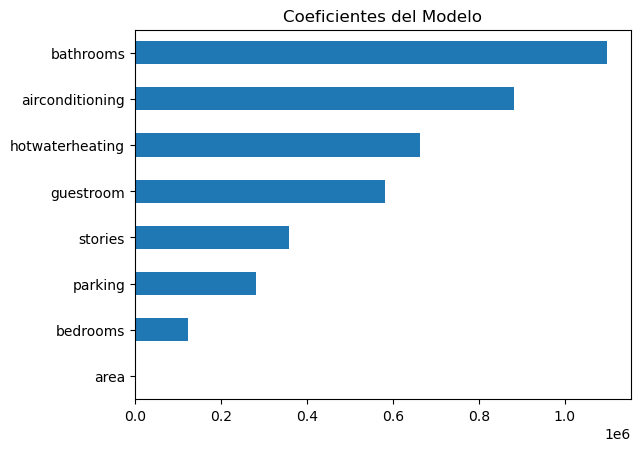

In [40]:
coeficientes = pd.Series(model.coef_, index=X_train.columns)
coeficientes.sort_values().plot(kind='barh')
plt.title("Coeficientes del Modelo")
plt.show()

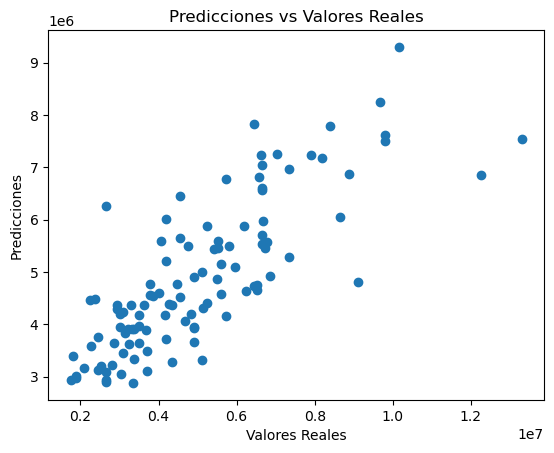

In [41]:
#realizamos un grafico de dispersion para ver la relacion entre los valores
#de prediccion y valores reaales
plt.scatter(y_test, y_test_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()